In [1]:
from Helpers import helpers
from sklearn.cluster import OPTICS


/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/art/estimators/certification/__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


we rerun the experiments partly to achieve the labels / noise information for seeds-dataset 2d (piecewise versus nD-Laplace).


In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd 

# load data
plain_dataset = helpers.load_dataset('../data/seeds-dataset/rq2-nd.csv')
columns = plain_dataset.columns[:2]
perturbed_data_piecewise = helpers.load_dataset('../ExperimentRunners/data/nd-Laplace/piecewise/seeds-dataset/full_perturbation.csv')
perturbed_data_nd_laplace = helpers.load_dataset('../ExperimentRunners/data/nd-Laplace/nd-Laplace/seeds-dataset/full_perturbation.csv')
perturbed_data_piecewise_2d = perturbed_data_piecewise[columns]
perturbed_data_nd_laplace_2d = perturbed_data_nd_laplace[columns]
perturbed_data_nd_laplace_2d.head()

,area,perimeter
0,12.812645,13.966395
1,16.089846,16.946059
2,8.513669,17.595152
3,9.041643,13.068320
4,16.435626,13.920147


In [3]:
# scale data
scaler = StandardScaler()
plain_dataset_2d_scaled = scaler.fit_transform(plain_dataset[columns])
perturbed_data_piecewise_2d_scaled = scaler.fit_transform(perturbed_data_piecewise_2d)
perturbed_data_nd_laplace_2d_scaled = scaler.fit_transform(perturbed_data_nd_laplace_2d)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
import seaborn as sns

def compare_datasets(plain, piecewise, nd_laplace, epsilon, dimensions):
    datasets = [plain, piecewise, nd_laplace]
    dataset_names = ['Plain', 'Piecewise', 'nD-Laplace']
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Collect all unique labels from all datasets
    all_labels = []
    for data in datasets:
        optics = OPTICS(min_samples=4).fit(data)
        labels = optics.labels_
        all_labels.extend(np.unique(labels))
    unique_labels = np.unique(all_labels)
    
    # Create a consistent color map based on unique labels
    color_map = {label: plt.cm.rainbow(i/len(unique_labels)) for i, label in enumerate(unique_labels)}
    
    
    for ax, data, name in zip(axes, datasets, dataset_names):
        # Run OPTICS clustering
        optics = OPTICS(min_samples=4).fit(data)
        
        # Extract labels and noise
        labels = optics.labels_
        noise_count = (labels == -1).sum()  # Count noise points
        
        # Plot KDE for each cluster
        for label in np.unique(labels):
            if label != -1:  # Exclude noise
                cluster_data = data[labels == label]
                sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
    
        
        # Plot centroids
        centroids = np.array([data[labels == label].mean(axis=0) for label in np.unique(labels) if label != -1])
        ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)
        
        # Create a legend for each subplot
        #handles = [plt.Line2D([0], [0], marker='o', color='w', label=str(label), markersize=10, markerfacecolor=color_map[label]) for label in np.unique(labels)]
        #ax.legend(handles=handles, loc="upper left", title="Clusters")
        
        plt.suptitle(f'OPTICS Clustering with KDE for {dimensions}-dimensions and epsilon: {epsilon}', fontsize=16)
        ax.set_title(f'{name}, Noise: {noise_count}', fontsize=16)  # Increase fontsize here for subtitle
        ax.set_xlabel('X-axis', fontsize=14)
        ax.set_ylabel('Y-axis', fontsize=14)
        
        # Increase the size of the tick labels
        ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.tight_layout()
    plt.show()

# Example usage
# compare_datasets(plain_data, piecewise_data, nd_laplace_data, epsilon_value, dimensions_value)


In [36]:
epsilon = 9
dimensions = 2
perturbed_data_piecewise_2d_scaled_epsilon_3 = perturbed_data_piecewise_2d_scaled[(perturbed_data_piecewise['epsilon'] == epsilon) & (perturbed_data_piecewise['dimension'] == dimensions)]
perturbed_data_nd_laplace_2d_scaled_epsilon_3 = perturbed_data_nd_laplace_2d_scaled[(perturbed_data_nd_laplace['epsilon'] == epsilon) & (perturbed_data_nd_laplace['dimension'] == dimensions)]
# print shapes
print(plain_dataset_2d_scaled.shape, perturbed_data_piecewise_2d_scaled_epsilon_3.shape, perturbed_data_nd_laplace_2d_scaled_epsilon_3.shape, epsilon, dimensions)

(210, 2) (210, 2) (210, 2) 9 2


/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y

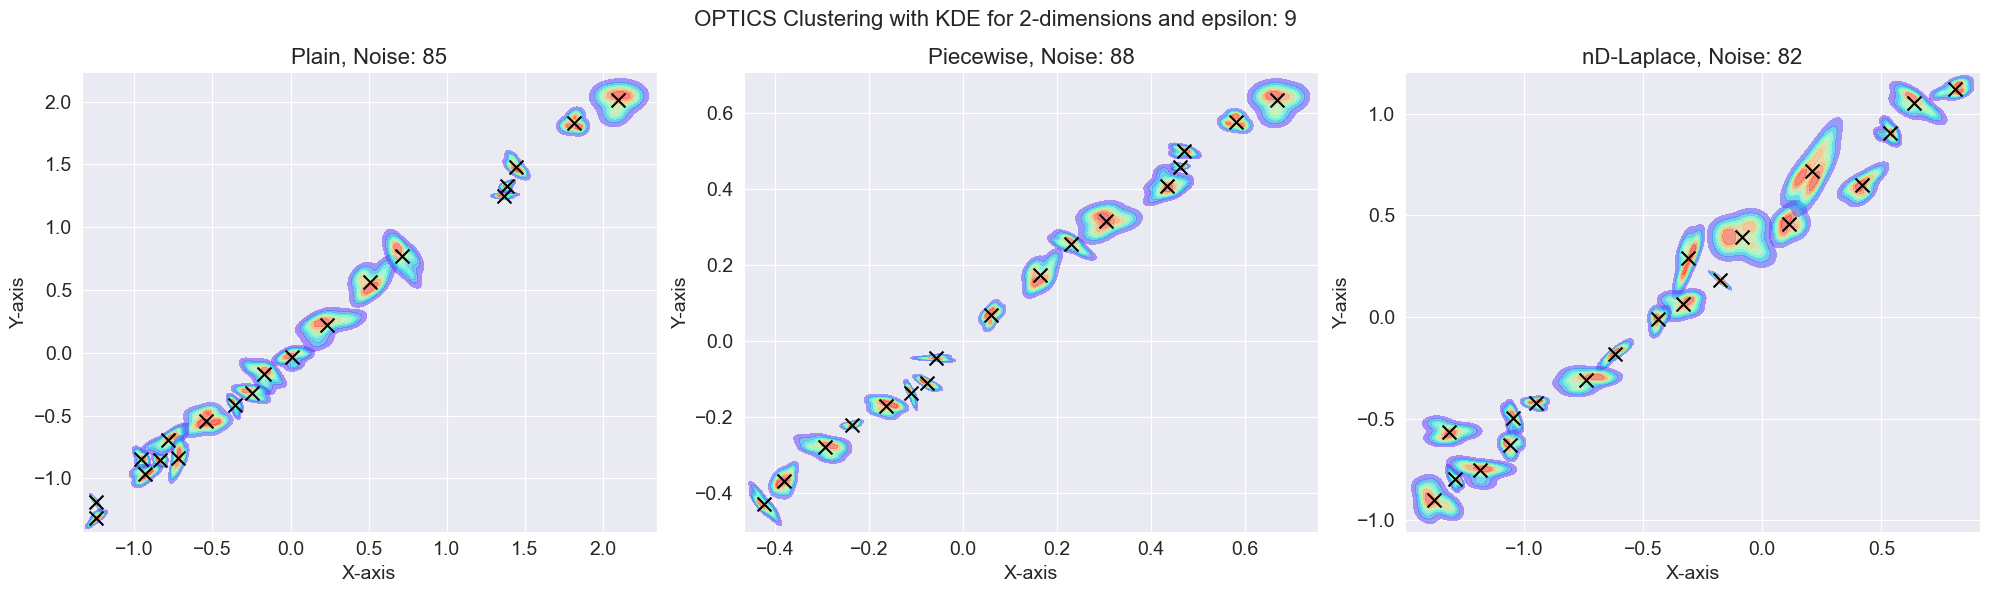

In [37]:
compare_datasets(plain_dataset_2d_scaled, perturbed_data_piecewise_2d_scaled_epsilon_3, perturbed_data_nd_laplace_2d_scaled_epsilon_3, epsilon, dimensions) 

In [38]:
cirlce_dataset_2d = helpers.load_dataset('../RQ3/data/circle_1000.csv')
circle_dataset_2d = cirlce_dataset_2d[['x1', 'x2']]
circle_dataset_2d.head()

,x1,x2
0,0.047532,0.147264
1,-0.246509,0.076068
2,0.097742,0.054781
3,-0.719132,0.527339
4,0.097023,0.139790


In [48]:
epsilon = 9
dimensions = 2
circle_dataset_2d_piecewise = helpers.load_dataset('../ExperimentRunners/data/nd-Laplace/piecewise/circle-dataset/full_perturbation.csv')
circle_dataset_2d_nd_laplace = helpers.load_dataset('../ExperimentRunners/data/nd-Laplace/nd-Laplace/circle-dataset/full_perturbation.csv')

/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y

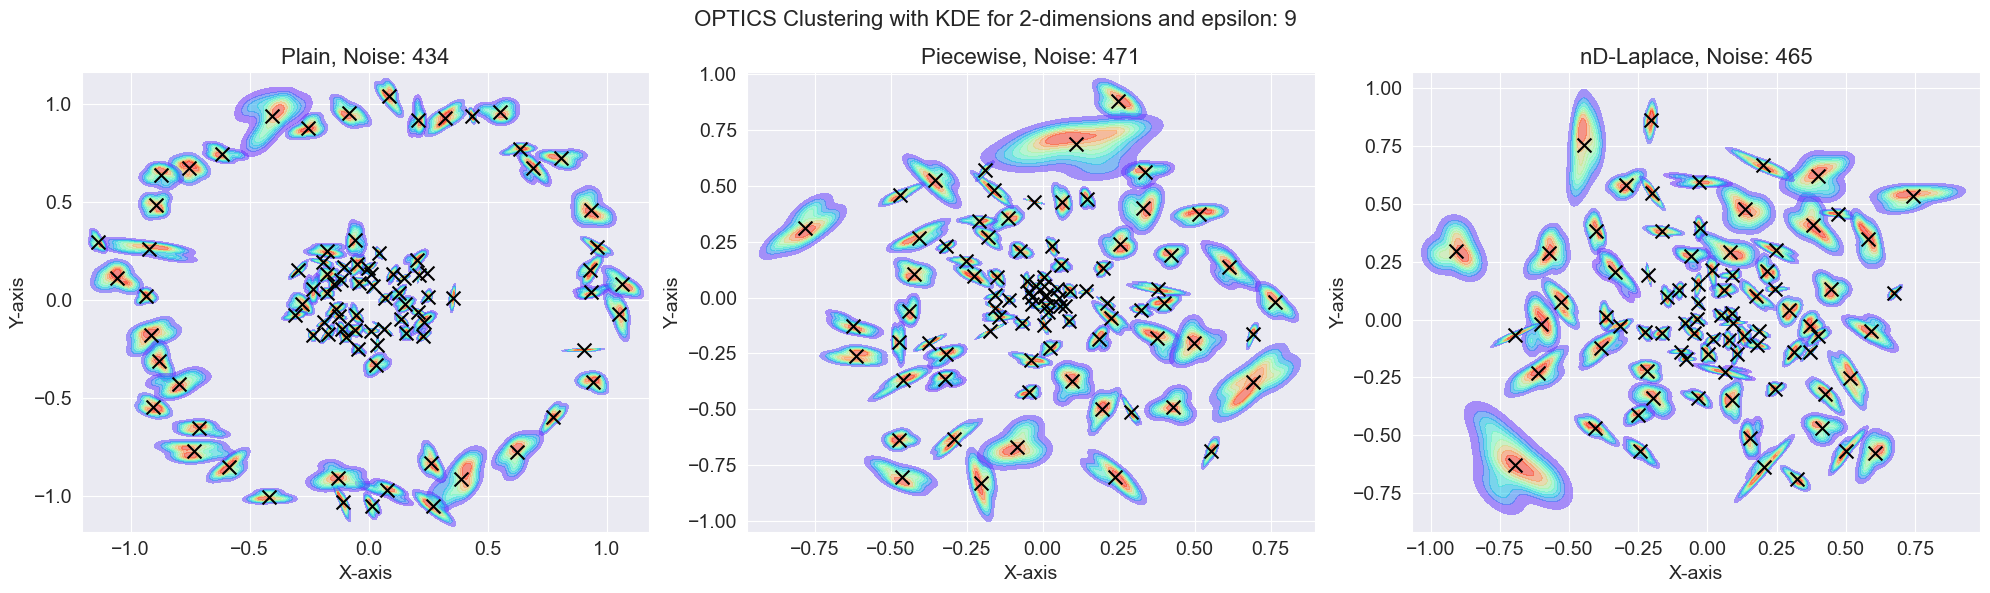

In [49]:

circle_dataset_2d_nd_laplace = circle_dataset_2d_nd_laplace[(circle_dataset_2d_nd_laplace['epsilon'] == epsilon) & (circle_dataset_2d_nd_laplace['dimension'] == dimensions)]
circle_dataset_2d_piecewise = circle_dataset_2d_piecewise[(circle_dataset_2d_piecewise['epsilon'] == epsilon) & (circle_dataset_2d_piecewise['dimension'] == dimensions)]
circle_dataset_2d_piecewise = circle_dataset_2d_piecewise[['x1', 'x2']]
circle_dataset_2d_nd_laplace = circle_dataset_2d_nd_laplace[['x1', 'x2']]
compare_datasets(circle_dataset_2d.values, circle_dataset_2d_piecewise.values, circle_dataset_2d_nd_laplace.values, epsilon, dimensions) 


In [52]:
circle_dataset_2d_nd_laplace_dense = helpers.load_dataset('../ExperimentRunners/data/nd-Laplace/density-nd-Laplace/circle-dataset/full_perturbation.csv')
circle_dataset_2d_nd_laplace_dense = circle_dataset_2d_nd_laplace_dense[(circle_dataset_2d_nd_laplace_dense['epsilon'] == epsilon) & (circle_dataset_2d_nd_laplace_dense['dimension'] == dimensions)]
circle_dataset_2d_nd_laplace_dense = circle_dataset_2d_nd_laplace_dense[['x1', 'x2']]
circle_dataset_2d_nd_laplace_dense.head()

,x1,x2
18000,-0.240992,0.423562
18001,-0.690031,-0.016365
18002,-0.084027,-0.041727
18003,0.556972,0.474355
18004,-0.516863,-0.001237


/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y

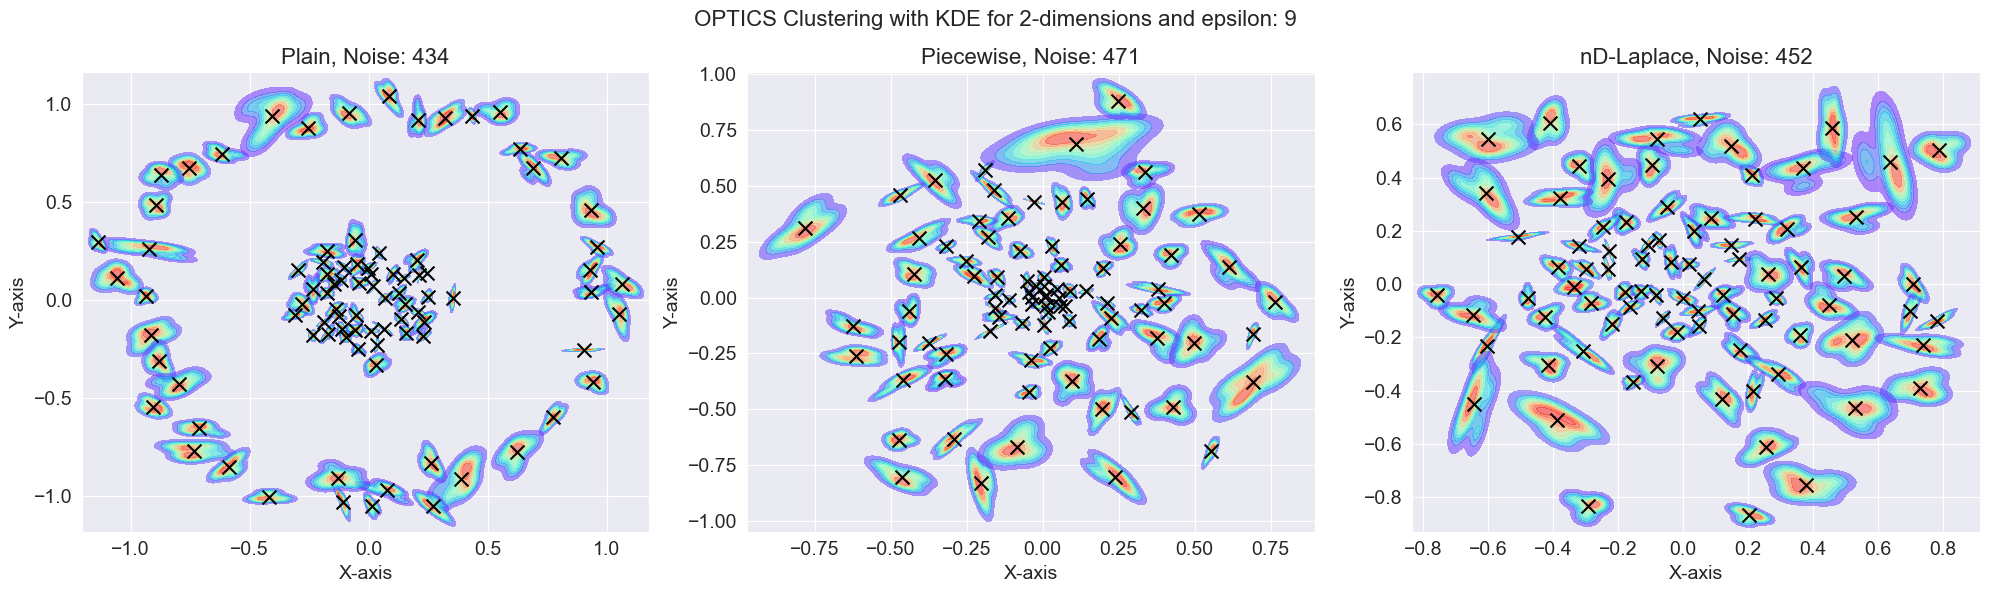

In [53]:
compare_datasets(circle_dataset_2d.values, circle_dataset_2d_piecewise.values, circle_dataset_2d_nd_laplace_dense.values, epsilon, dimensions)

In [55]:
line_dataset_2d = helpers.load_dataset('../RQ3/data/line_1000.csv')
line_dataset_2d_nd_laplace_dense = helpers.load_dataset('../ExperimentRunners/data/nd-Laplace/nd-Laplace/line-dataset/full_perturbation.csv')
line_dataset_2d_piecewise = helpers.load_dataset('../ExperimentRunners/data/nd-Laplace/piecewise/line-dataset/full_perturbation.csv')
line_dataset_2d_nd_laplace_dense = line_dataset_2d_nd_laplace_dense[(line_dataset_2d_nd_laplace_dense['epsilon'] == epsilon) & (line_dataset_2d_nd_laplace_dense['dimension'] == dimensions)]
line_dataset_2d_piecewise = line_dataset_2d_piecewise[(line_dataset_2d_piecewise['epsilon'] == epsilon) & (line_dataset_2d_piecewise['dimension'] == dimensions)]
line_dataset_2d_piecewise = line_dataset_2d_piecewise[['x1', 'x2']]
line_dataset_2d_nd_laplace_dense = line_dataset_2d_nd_laplace_dense[['x1', 'x2']]
line_dataset_2d = line_dataset_2d[['x1', 'x2']]
line_dataset_2d_nd_laplace_dense.head()

,x1,x2
18000,-0.020411,-0.134307
18001,-0.055002,0.160877
18002,0.400403,-0.138511
18003,-0.205262,0.053699
18004,-0.195636,0.179395


/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y

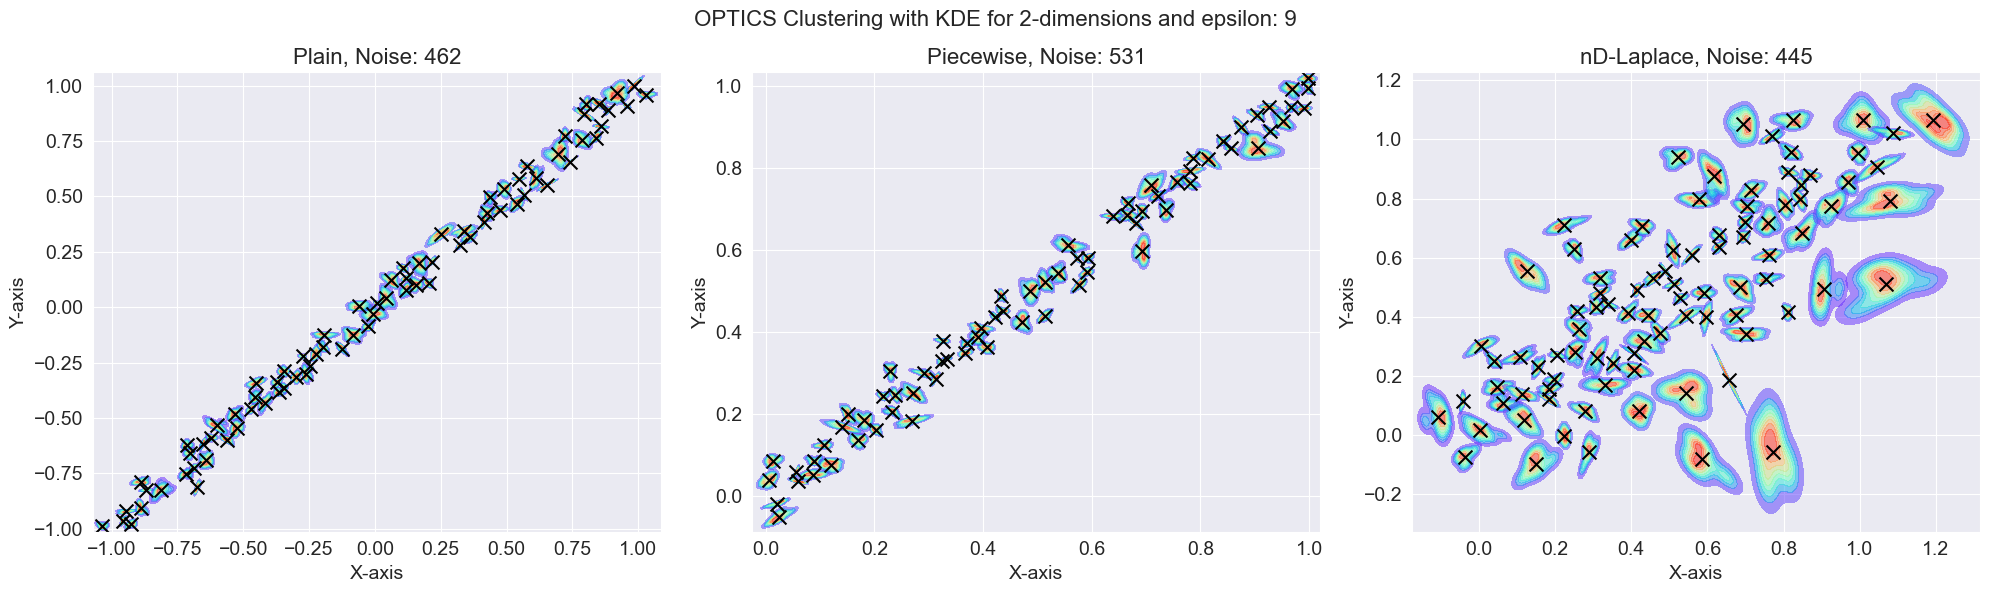

In [56]:
compare_datasets(line_dataset_2d.values, line_dataset_2d_piecewise.values, line_dataset_2d_nd_laplace_dense.values, epsilon, dimensions)

In [57]:
line_dataset_2d_nd_laplace_dense.describe()

,x1,x2
count,1000.000000,1000.000000
mean,0.506277,0.494750
std,0.349571,0.351313
min,-0.534085,-1.012231
25%,0.248747,0.233458
50%,0.501413,0.494836
75%,0.763677,0.771846
max,2.185008,1.503759


In [58]:
line_dataset_2d_piecewise.describe()

,x1,x2
count,1000.000000,1000.000000
mean,0.498132,0.501005
std,0.293169,0.299569
min,-0.008948,-0.122484
25%,0.241931,0.237747
50%,0.501706,0.506834
75%,0.749863,0.759990
max,1.005995,1.127409


In [59]:
line_dataset_2d.describe()

,x1,x2
count,1000.000000,1000.000000
mean,-0.001667,-0.003237
std,0.579891,0.576920
min,-1.074294,-1.048460
25%,-0.496326,-0.487150
50%,0.002585,-0.006761
75%,0.489397,0.497795
max,1.054035,1.069153


In [62]:
heart_dataset = helpers.load_dataset('../data/heart-dataset/heart_numerical.csv')
heart_dataset.head()

,baseline value,histogram_min,accelerations,fetal_movement,uterine_contractions,light_decelerations,histogram_width,histogram_max,histogram_number_of_peaks,class
0,120.0,62.0,0.0,0.0,0.0,0.0,64.0,126.0,2.0,1.0
1,132.0,68.0,4.0,0.0,4.0,2.0,130.0,198.0,6.0,0.0
2,133.0,68.0,2.0,0.0,5.0,2.0,130.0,198.0,5.0,0.0
3,134.0,53.0,2.0,0.0,6.0,2.0,117.0,170.0,11.0,0.0
4,132.0,53.0,4.0,0.0,5.0,0.0,117.0,170.0,9.0,0.0


In [65]:
heart_columns = ['baseline value', 'histogram_min']
heart_dataset_2d = heart_dataset[heart_columns]
heart_dataset_perturbed = helpers.load_dataset('../ExperimentRunners/data/nd-Laplace/nd-Laplace/heart-dataset/full_perturbation.csv')
heart_dataset_perturbed_piecewise = helpers.load_dataset('../ExperimentRunners/data/nd-Laplace/piecewise/heart-dataset/full_perturbation.csv')

In [70]:
heart_dataset_2d_and_epsilon9 = heart_dataset_perturbed[(heart_dataset_perturbed['epsilon'] == 5) & (heart_dataset_perturbed['dimension'] == 2)]
heart_dataset_2d_and_epsilon9_piecewise = heart_dataset_perturbed_piecewise[(heart_dataset_perturbed_piecewise['epsilon'] == 5) & (heart_dataset_perturbed_piecewise['dimension'] == 2)]
heart_dataset_2d_and_epsilon9 = heart_dataset_2d_and_epsilon9[heart_columns]
heart_dataset_2d_and_epsilon9_piecewise = heart_dataset_2d_and_epsilon9_piecewise[heart_columns]

/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=cluster_data[:, 0], y=cluster_data[:, 1], ax=ax, cmap='rainbow', shade=True, shade_lowest=False, alpha=0.5)
/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_86364/2030728030.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an e

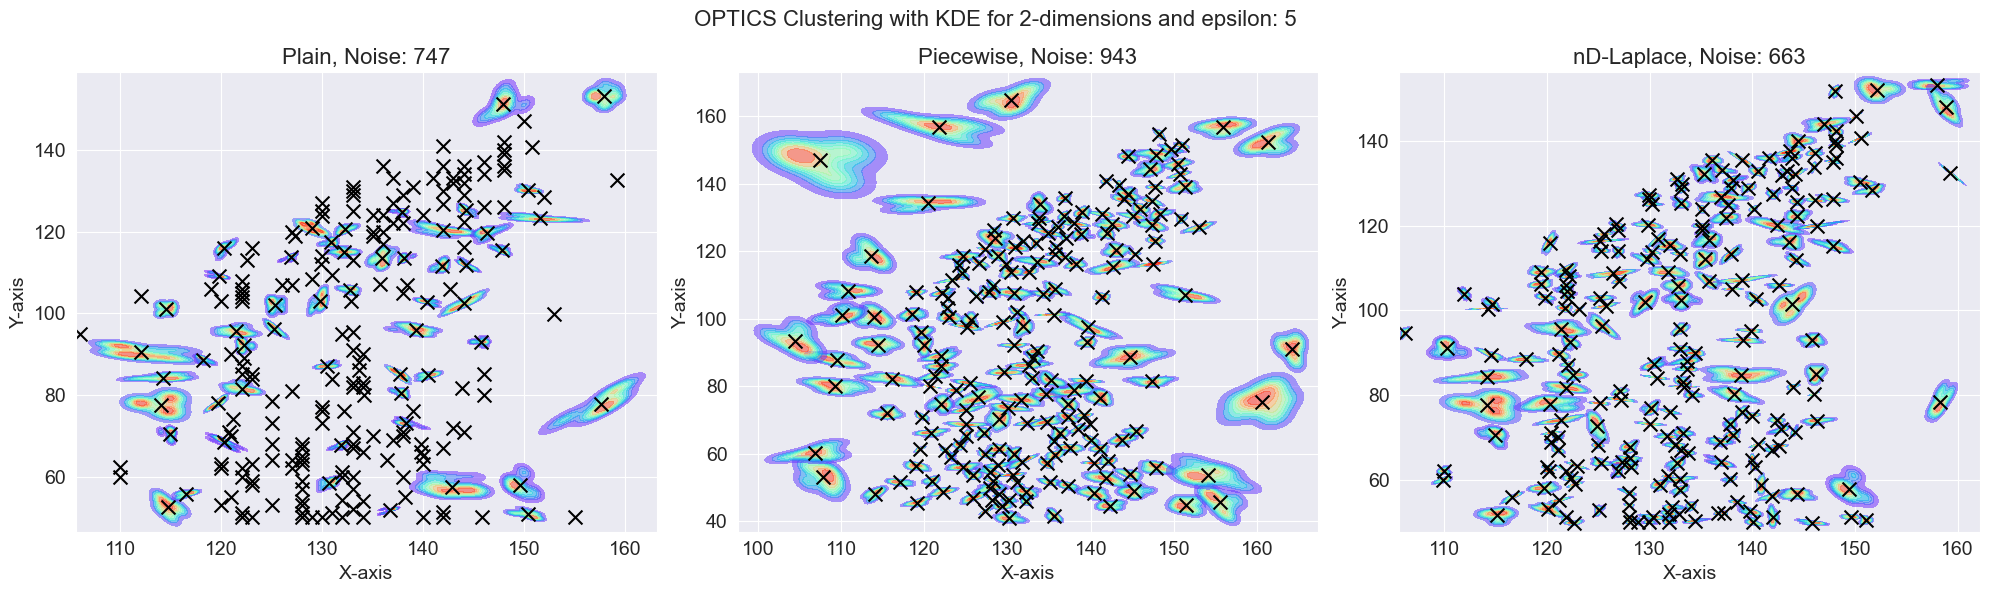

In [72]:
compare_datasets(heart_dataset_2d.values, heart_dataset_2d_and_epsilon9_piecewise.values, heart_dataset_2d_and_epsilon9.values, 5, dimensions)